Some useful syntaxes while working with PIL

In [ ]:
import PIL
PIL.__version__
help(PIL)
dir(PIL)
from PIL import Image
help(Image)
#file="readonly/msi_recruitment.gif"
image=Image.open(file)
print(image)
import inspect
print("The type of the image is " + str(type(image)))
inspect.getmro(type(image))
image.show()
from IPython.display import display
display(image)

In [ ]:
import PIL
from PIL import Image
# And lets import the display functionality
from IPython.display import display
# And finally, lets load the image we were working with last time
file="readonly/msi_recruitment.gif"
image=Image.open(file)

Trying different filters


Checking the image format

The color_mode variable will contain the color mode of the image, which could be one of the following values:

'1': The image is in black and white (binary) mode.

'L': The image is in grayscale mode.

'P': The image is in indexed color mode.

'RGB': The image is in RGB color mode.

'RGBA': The image is in RGB color mode with an alpha channel (transparency).

'CMYK': The image is in CMYK color mode (used in print).

RGBA


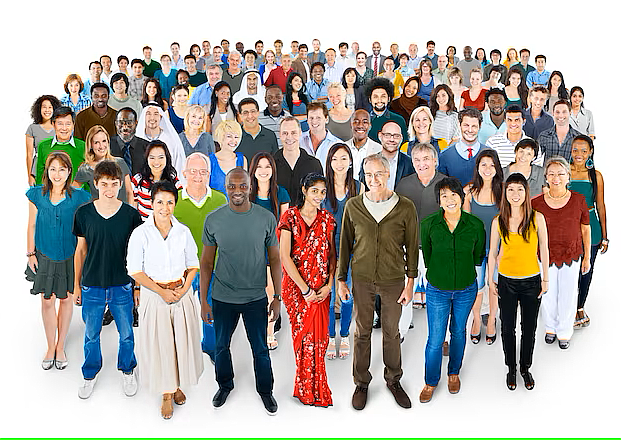

In [18]:
import PIL
from PIL import Image
from PIL import ImageFilter
from IPython.display import display
# Open the image file
image = Image.open('Screenshot 2023-07-18 151620.png')  # Replace 'image.png' with the actual path to your image file

# Check the color mode
color_mode = image.mode

# Print the color mode
print(color_mode)
image = image.convert('RGB')
bullered = image.filter(PIL.ImageFilter.BLUR)
CONTOUR = image.filter(PIL.ImageFilter.CONTOUR)
DETAIL = image.filter(PIL.ImageFilter.DETAIL)
EDGE_ENHANCE = image.filter(PIL.ImageFilter.EDGE_ENHANCE)
EDGE_ENHANCE_MORE = image.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)
SHARPEN = image.filter(PIL.ImageFilter.SHARPEN)
display(SHARPEN)

You can find some of the avialable filters as below

BLUR: Applies a blur effect to the image.

CONTOUR: Finds the edges or contours in the image.

DETAIL: Enhances the details in the image.

EDGE_ENHANCE: Enhances the edges in the image.

EDGE_ENHANCE_MORE: Enhances the edges in the image more aggressively.

EMBOSS: Applies an emboss effect to the image.

FIND_EDGES: Finds the edges in the image.

SHARPEN: Sharpens the image by enhancing the edges.

SMOOTH: Applies a smoothing effect to the image.

SMOOTH_MORE: Applies a stronger smoothing effect to the image.

EMBOSS: Applies an emboss effect to the image.

GaussianBlur: Applies a Gaussian blur to the image with a specified radius.


In [ ]:
print("{}x{}".format(image.width, image.height))
help(image.crop)

display(image.crop((50,0,190,150)))
from PIL import ImageDraw
drawing_object=ImageDraw.Draw(image)
drawing_object.rectangle((50,0,190,150), fill = None, outline ='red')
display(image)

contact sheet

In [ ]:
from PIL import ImageEnhance
#it takes a value between 0.0 (a completely black # image) and 1.0 (the original image) to adjust the brightness.
enhancer=ImageEnhance.Brightness(image)
#we make an empty list to store all of the different variation of the pic
images=[]
for i in range(0, 10):
  images.append(enhancer.enhance(i/10))
# divding so we can get our desired number
print(images)
#There are several different approaches we can use, but simply create a new image # the first image, but ten times as high. Lets check out the PIL.Image.new functionality
help(PIL.Image.new)
 # The new function requires that we pass it a mode. We're going to use the mode 'RGB' which # Red, Green, and Blue, and is the mode of our current first image. There are lots of different # formats, and this one is most common.
# For the size we have a tuple, which is the width of the image and the height. We'll use # current first image, but for the height we'll multiple this by ten. This will make a # our contact sheet. Finally, the color is optional, and we'll just leave it at black.
#we are taking the fisrt image to use its height and length
first_image=images[0]
from PIL import Image
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width,10*first_image.height))

#paste() the results in. The paste() # will be called on the contact_sheet object, and takes in a new image to paste, as well # offset for that image. In our case, the x position is always 0, but the y location will # 450 pixels each time we iterate through the loop.
#Lets first create a counter variable for the y location. It will start at zero
current_location = 0
for img in images:
# Lets paste the current image into the contact sheet
contact_sheet.paste(img, (0, current_location) )
# And update the current_location counter
current_location=current_location+450

#This contact sheet has gotten big: 4,500 pixels tall! Lets just resize this sheet
#this using the resize() function. This function just takes a tuple of width and height, # everything down to the size of just two individual images
contact_sheet = contact_sheet.resize((160,900) )
# Now lets just display that composite image
display(contact_sheet)

For 3*3 we use the below code

In [ ]:
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
# Now we want to iterate over our images and place them into this grid. Remember that in # location of where we refer to as an image in the upper right hand corner, so this will # one variable for the X dimension, and one for the Y dimension.
x=0
y=0
# Now, lets iterate over our images. Except, we don't want to both with the first one, # just solid black. Instead we want to just deal with the images after the first one, and # give us nine in total
for img in images[1:]:
# Lets paste the current image into the contact sheet
contact_sheet.paste(img, (x, y) )
# Now we update our X position. If it is going to be the width of the image, then we # and update Y as well to point to the next "line" of the contact sheet.
if x+first_image.width == contact_sheet.width:
x=0
y=y+first_image.height
else: x=x+first_image.width
6
# Now lets resize the contact sheet. We'll just make it half the size by dividing it by # the resize function needs to take round numbers, we need to convert our divisions from # numbers into integers using the int() function.
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/# Now lets display that composite image
display(contact_sheet)

going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

3


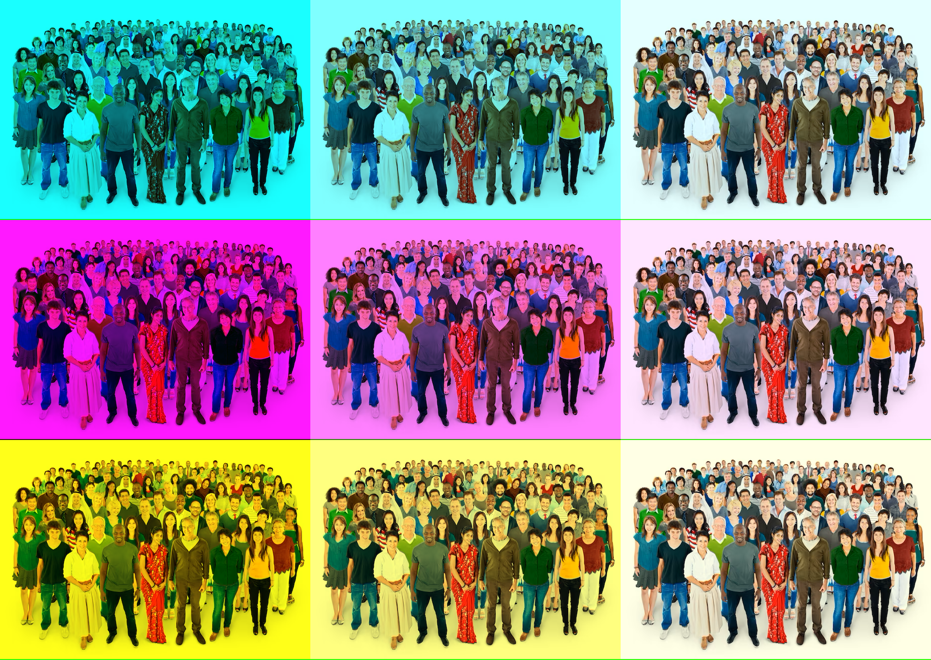

In [18]:
import PIL
from PIL import Image
from PIL import ImageEnhance

# read image and convert to RGB
image=Image.open("Screenshot 2023-07-18 151620.png")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
#enhancer=ImageEnhance.Brightness(image)
#images=[]
#for i in range(1, 10):
#    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses

intensity = [0.1, 0.5, 0.9]
channel = 0
modified_image_r =[]
modified_image_g =[]
modified_image_b =[]
for i in range (3):
    red, green, blue = image.split()
    modified_red = red.point(lambda x: int(x * intensity[i]))
    modified_image_r.append(Image.merge("RGB", (modified_red, green, blue)))
for i in range (3):
    modified_green = green.point(lambda x:int(x * intensity[i]))
    modified_image_g.append(Image.merge("RGB", (red, modified_green, blue)))

for i in range (3):
    modified_blue = blue.point(lambda x:int(x * intensity[i]))
    modified_image_b.append(Image.merge("RGB", (red, green, modified_blue)))

print(len(modified_image_r))


first_image = modified_image_r[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in modified_image_r:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    x=x+first_image.width
x = 0
y=y+first_image.height
for img in modified_image_g:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    x=x+first_image.width
x = 0
y=y+first_image.height
for img in modified_image_b:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

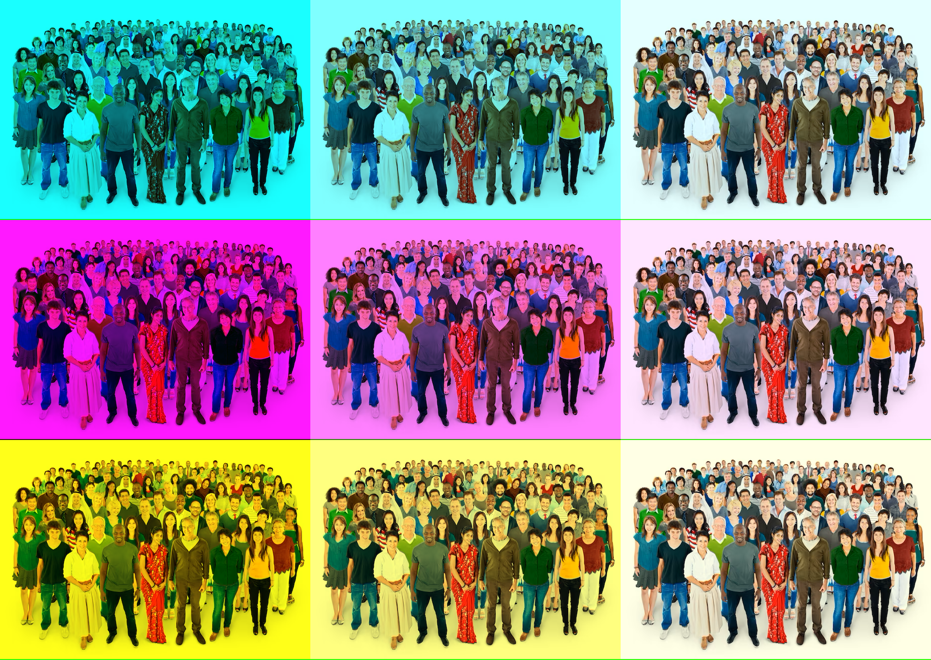

In [19]:
from PIL import Image

image=Image.open("Screenshot 2023-07-18 151620.png")
image = image.convert('RGB')

intensity = [0.1, 0.5, 0.9]

modified_image_r = []
modified_image_g = []
modified_image_b = []

red, green, blue = image.split()

for i in range(len(intensity)):
    modified_red = red.point(lambda x: int(x * intensity[i]))
    modified_image_r.append(Image.merge("RGB", (modified_red, green, blue)))

    modified_green = green.point(lambda x: int(x * intensity[i]))
    modified_image_g.append(Image.merge("RGB", (red, modified_green, blue)))

    modified_blue = blue.point(lambda x: int(x * intensity[i]))
    modified_image_b.append(Image.merge("RGB", (red, green, modified_blue)))

first_image_r = modified_image_r[0]
first_image_g = modified_image_g[0]
first_image_b = modified_image_b[0]

contact_sheet = Image.new(first_image_r.mode, (first_image_r.width * len(intensity), first_image_r.height * 3))
x = 0
y = 0

for img in modified_image_r + modified_image_g + modified_image_b:
    contact_sheet.paste(img, (x, y))
    x = x + img.width
    if x >= contact_sheet.width:
        x = 0
        y = y + img.height

contact_sheet = contact_sheet.resize((int(contact_sheet.width / 2), int(contact_sheet.height / 2)))
contact_sheet.show()


Now we add Some Text to the pics

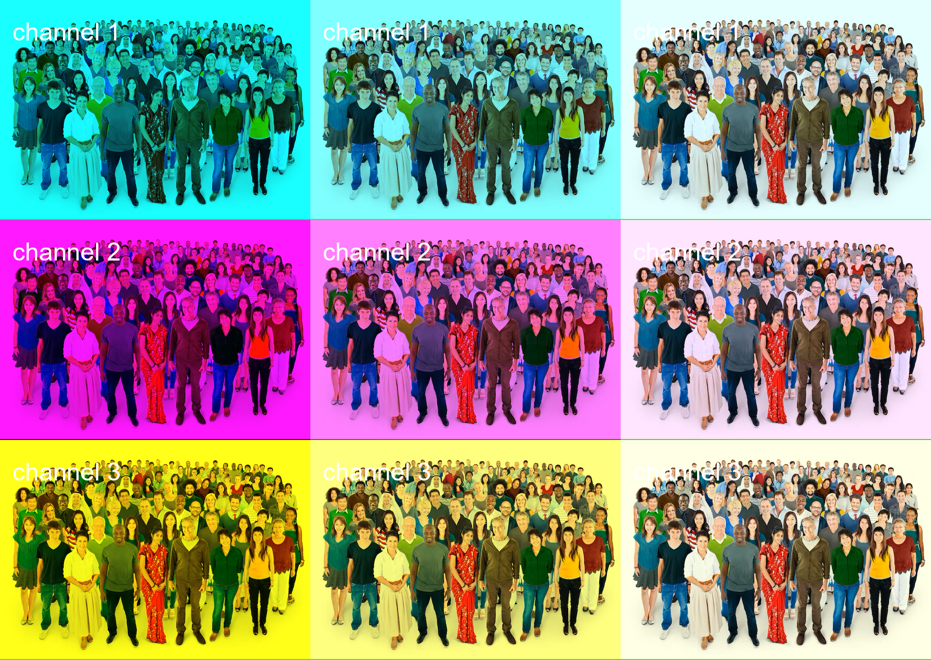

In [30]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("Screenshot 2023-07-18 151620.png")
image = image.convert('RGB')

intensity = [0.1, 0.5, 0.9]

modified_image_r = []
modified_image_g = []
modified_image_b = []

red, green, blue = image.split()

for i in range(len(intensity)):
    modified_red = red.point(lambda x: int(x * intensity[i]))
    modified_image_r.append(Image.merge("RGB", (modified_red, green, blue)))

    modified_green = green.point(lambda x: int(x * intensity[i]))
    modified_image_g.append(Image.merge("RGB", (red, modified_green, blue)))

    modified_blue = blue.point(lambda x: int(x * intensity[i]))
    modified_image_b.append(Image.merge("RGB", (red, green, modified_blue)))

first_image_r = modified_image_r[0]
first_image_g = modified_image_g[0]
first_image_b = modified_image_b[0]

contact_sheet = Image.new(first_image_r.mode, (first_image_r.width * len(intensity), first_image_r.height * 3))
x = 0
y = 0

draw = ImageDraw.Draw(contact_sheet)  # Create draw object for contact sheet

for img in modified_image_r:
    contact_sheet.paste(img, (x, y))
    draw.text((x + 25, y + 35), "channel 1", fill="white", font=ImageFont.truetype("arial.ttf", 50))
    x += img.width
    if x >= contact_sheet.width:
        x = 0
        y += img.height

for img in modified_image_g:
    contact_sheet.paste(img, (x, y))
    draw.text((x + 25, y + 35), "channel 2", fill="white", font=ImageFont.truetype("arial.ttf", 50))
    x += img.width
    if x >= contact_sheet.width:
        x = 0
        y += img.height

for img in modified_image_b:
    contact_sheet.paste(img, (x, y))
    draw.text((x + 25, y + 35), "channel 3", fill="white", font=ImageFont.truetype("arial.ttf", 50))
    x += img.width
    if x >= contact_sheet.width:
        x = 0
        y += img.height

contact_sheet = contact_sheet.resize((int(contact_sheet.width / 2), int(contact_sheet.height / 2)))
contact_sheet.show()


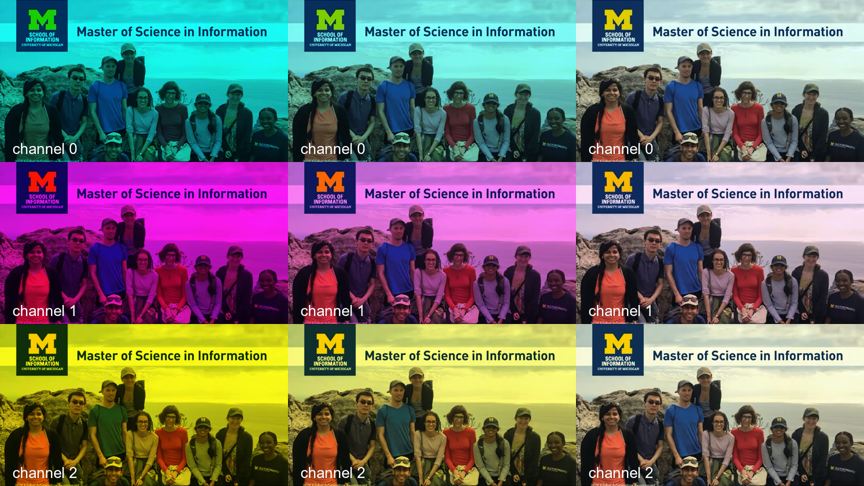

In [47]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("Screenshot 2023-07-19 132949.png")
image = image.convert('RGB')

intensity = [0.1, 0.5, 0.9]

modified_image_r = []
modified_image_g = []
modified_image_b = []

red, green, blue = image.split()

for i in range(len(intensity)):

    modified_red = red.point(lambda x: int(x * intensity[i]))
    modified_image_r.append(Image.merge("RGB", (modified_red, green, blue)))

    modified_green = green.point(lambda x: int(x * intensity[i]))
    modified_image_g.append(Image.merge("RGB", (red, modified_green, blue)))

    modified_blue = blue.point(lambda x: int(x * intensity[i]))
    modified_image_b.append(Image.merge("RGB", (red, green, modified_blue)))

first_image_r = modified_image_r[0]
first_image_g = modified_image_g[0]
first_image_b = modified_image_b[0]

contact_sheet = Image.new(first_image_r.mode, (first_image_r.width * len(intensity), first_image_r.height * 3))
x = 0
y = 0

draw = ImageDraw.Draw(contact_sheet)  # Create draw object for contact sheet

for img in modified_image_r:
    contact_sheet.paste(img, (x, y))
    draw.text((x + 25, y + 280), "channel 0", fill="white", font=ImageFont.truetype("arial.ttf", 30))
    x += img.width
    if x >= contact_sheet.width:
        x = 0
        y += img.height

for img in modified_image_g:
    contact_sheet.paste(img, (x, y))
    draw.text((x + 25, y + 280), "channel 1", fill="white", font=ImageFont.truetype("arial.ttf", 30))
    x += img.width
    if x >= contact_sheet.width:
        x = 0
        y += img.height

for img in modified_image_b:
    contact_sheet.paste(img, (x, y))
    draw.text((x + 25, y + 280), "channel 2", fill="white", font=ImageFont.truetype("arial.ttf", 30))
    x += img.width
    if x >= contact_sheet.width:
        x = 0
        y += img.height

contact_sheet = contact_sheet.resize((int(contact_sheet.width / 2), int(contact_sheet.height / 2)))
contact_sheet.show()

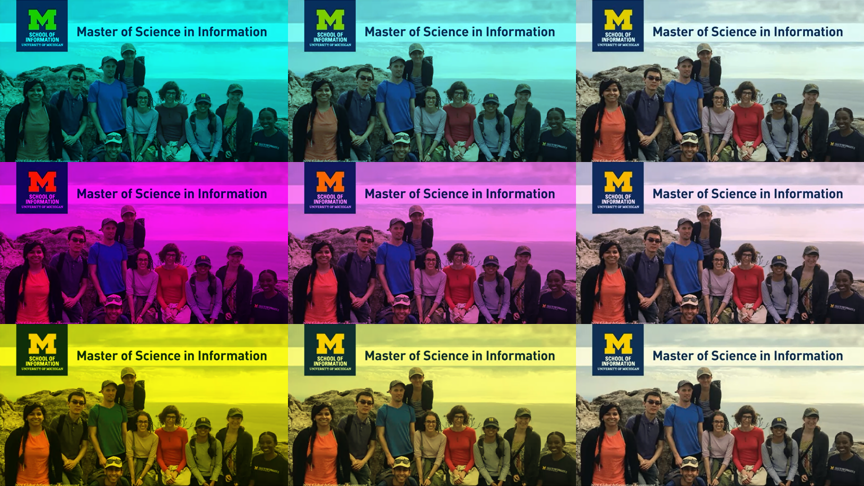

In [46]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("Screenshot 2023-07-19 132949.png")
image = image.convert('RGB')

intensity = [0.1, 0.5, 0.9]

modified_image_r = []
modified_image_g = []
modified_image_b = []

contact_sheet = Image.new("RGB", (image.width * len(intensity), image.height * 3))
draw = ImageDraw.Draw(contact_sheet)  # Create draw object for contact sheet

x = 0
y = 0

font = ImageFont.truetype("arial.ttf", 30)

for i in range(len(intensity)):
    modified_red = image.split()[0].point(lambda x: int(x * intensity[i]))
    modified_image_r.append(Image.merge("RGB", (modified_red, image.split()[1], image.split()[2])))

    modified_green = image.split()[1].point(lambda x: int(x * intensity[i]))
    modified_image_g.append(Image.merge("RGB", (image.split()[0], modified_green, image.split()[2])))

    modified_blue = image.split()[2].point(lambda x: int(x * intensity[i]))
    modified_image_b.append(Image.merge("RGB", (image.split()[0], image.split()[1], modified_blue)))

for img in modified_image_r:
    draw.text((x + 25, y + 265), "Channel 1", fill="white", font=font)
    contact_sheet.paste(img, (x, y))
    x += img.width

x = 0
y += image.height

for img in modified_image_g:
    draw.text((x + 25, y + 265), "Channel 2", fill="white", font=font)
    contact_sheet.paste(img, (x, y))
    x += img.width

x = 0
y += image.height

for img in modified_image_b:
    draw.text((x + 25, y + 265), "Channel 3", fill="white", font=font)
    contact_sheet.paste(img, (x, y))
    x += img.width

contact_sheet = contact_sheet.resize((int(contact_sheet.width / 2), int(contact_sheet.height / 2)))
contact_sheet.show()

In [ ]:
# a sample of my peer
#credit to whoever made it


import PIL
from PIL import Image
from PIL import ImageDraw , ImageFont

import inspect

### required:
image_final = Image.open("readonly/assignment1.png")
#display(image_final)

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

# function for New image with channel and intensity
def image_transform(image,channel=0,inty=0.9):
    rgb_list = image.split()
    if channel == 0:
        rgb_list_new = [rgb_list[0].point(lambda i:i*inty),rgb_list[1],rgb_list[2]]
        new_image = Image.merge('RGB', rgb_list_new)
    elif channel == 1:
        rgb_list_new = [rgb_list[0],rgb_list[1].point(lambda i:i*inty),rgb_list[2]]
        new_image = Image.merge('RGB', rgb_list_new)
    elif channel == 2:
        rgb_list_new = [rgb_list[0],rgb_list[1],rgb_list[2].point(lambda i:i*inty)]
        new_image = Image.merge('RGB', rgb_list_new)
    elif channel > 2:
        new_image = "Channel more than 2"

    return new_image

def text_image_create(channel,inty):
    text_image = PIL.Image.new('RGB', (image.width,50))
    draw = ImageDraw.Draw(text_image)
    draw.font = ImageFont.truetype("readonly/fanwood-webfont.ttf",size = 50)
    draw.text((0,0), "channel {} intensity {}".format(channel, inty), fill = "white")
    return(text_image)


# build a list of 9 images which have different brightnesses
#enhancer=ImageEnhance.Brightness(image)
images_r=[]
inty = 0.1
channel = 0
for channel in range(0,3):
    for inty in [0.1,0.5,0.9]:
        text_image = text_image_create(channel,inty)

        new_image = PIL.Image.new(image.mode, (image.width,image.height+50))
        new_image.paste(image,(0,0))
        new_image.paste(text_image,(0,image.height))

        images_r.append(image_transform(new_image,channel,inty))

# create a contact sheet from different brightnesses
first_image=images_r[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
#contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height))
x=0
y=0


for img in images_r:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)